In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [31]:
from chromalab.spectra import Spectra, Illuminant, convert_refs_to_spectras
from chromalab.observer import Observer
from chromalab.maxbasis import MaxBasis
from chromalab.spectral_analysis import NTIREDataLoader, RudermanAnalysis
from chromalab.visualizer import PSWrapper, DisplayBasisType, exportAndPlay
from chromalab.animation import Animation


In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [4]:
wavelengths10 = np.arange(400, 701, 10)
d65 = Illuminant.get("D65")

trichromat = Observer.trichromat(wavelengths=wavelengths10, illuminant=d65) 
maxbasis_tri = MaxBasis(trichromat, verbose=True)
LMS_to_RGB = maxbasis_tri.get_cone_to_maxbasis_transform()

tetrachromat = Observer.tetrachromat(wavelengths=wavelengths10, illuminant=d65, verbose=True)
maxbasis = MaxBasis(tetrachromat, verbose=True)
viz = PSWrapper(tetrachromat, maxbasis, itemsToDisplay=PSWrapper.ItemsToDisplay.MESH, displayBasis=DisplayBasisType.CONE, verbose=True)

100%|██████████| 28/28 [00:00<00:00, 1029.11it/s]
/Users/jessicalee/Projects/generalized-colorimetry/code/ChromaLab/chromalab/spectra.py:36: UserWarning: Data has values not between 0 and 1. Clipping.
  warnings.warn("Data has values not between 0 and 1. Clipping.")
100%|██████████| 28/28 [00:00<00:00, 52.75it/s]


[polyscope] Backend: openGL3_glfw -- Loaded openGL version: 4.1 Metal - 83.1


100%|██████████| 8990/8990 [00:19<00:00, 467.16it/s]


In [5]:
# Process NTIRE Data
# ntire_data_loader = NTIREDataLoader("/data/NTIRE_2022", tetrachromat)
# ntire_data_loader.getConeResponses()
# ntire_data_loader.getSpatialConeResponses()
# ntire_data_loader.save("./data/ntire_data_loader.pkl")

# Load NTIRE Data
ntire_data_loader = NTIREDataLoader.load("./data/ntire_data_loader.pkl")

In [6]:
tetrachromat_analysis = RudermanAnalysis(tetrachromat, ntire_data_loader)
tetrachromat_analysis.doConeResponsePCA()

[[ 0.49793299  0.50450443  0.50035148  0.49717845]
 [ 0.86178678 -0.20338577 -0.29933659 -0.35546501]
 [-0.09675478  0.76733862 -0.04946008 -0.63196808]
 [ 0.00497864 -0.33955994  0.81092521 -0.47652341]]
[  9.62180134e-01   3.59249986e-02   1.89164777e-03   3.21939766e-06]


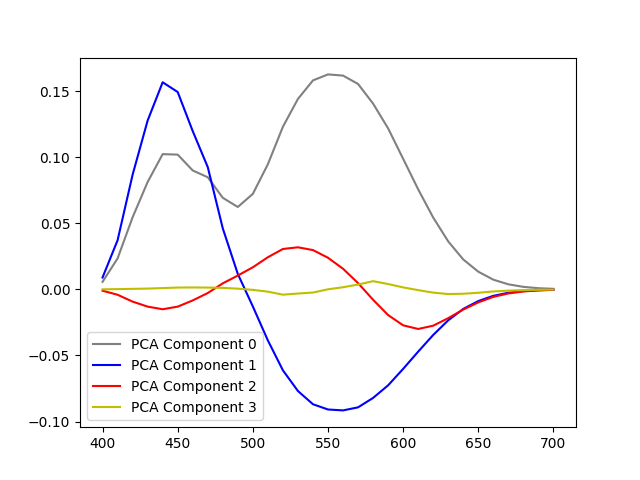

In [7]:
tetrachromat_analysis.plotTransformedConeFunds()

In [8]:
# saved_format = np.concatenate([np.asarray(wavelengths10[np.newaxis], dtype=int), tetrachromat_analysis.spectra_to_PCA])
# np.savetxt("./outputs/data_pcs_human_comp.csv", saved_format, delimiter=',')

In [32]:
tetrachromat_analysis.doConeResponsePCA()
tetrachromat_analysis.plotPCA4D(viz, LMS_to_RGB)
viz.ps.show()

[[ 0.49793299  0.50450443  0.50035148  0.49717845]
 [ 0.86178678 -0.20338577 -0.29933659 -0.35546501]
 [-0.09675478  0.76733862 -0.04946008 -0.63196808]
 [ 0.00497864 -0.33955994  0.81092521 -0.47652341]]
[  9.62180134e-01   3.59249986e-02   1.89164777e-03   3.21939766e-06]


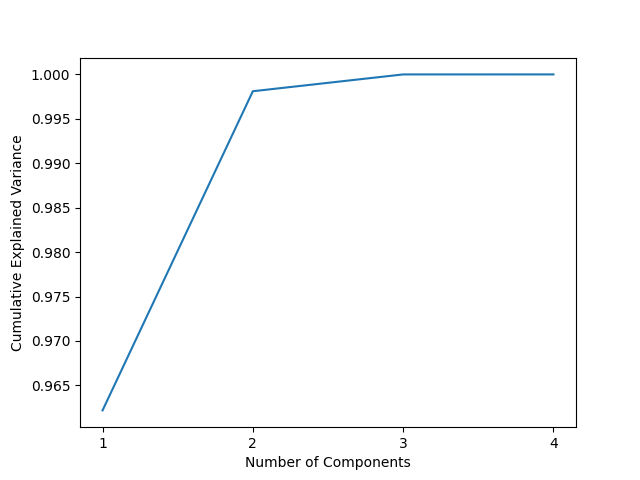

In [27]:
tetrachromat_analysis.plotExplainedRatio()

[[ 0.16211509  0.16540002  0.1641324  ...,  0.16503685  0.1636319
   0.16256467]
 [ 0.35891394  0.04119066  0.01069512 ..., -0.16223181 -0.19061699
  -0.20716808]
 [-0.06810146 -0.19553617 -0.20559559 ...,  0.14801756  0.13458618
   0.12643773]
 ..., 
 [ 0.00117405 -0.1100328   0.26553027 ...,  0.11137414 -0.26509133
   0.15523274]
 [ 0.00141585 -0.10001405  0.23891138 ...,  0.09941063 -0.23799107
   0.13997541]
 [ 0.00097143 -0.06832648  0.16344964 ..., -0.06679738  0.16193813
  -0.09596289]]
[  8.90972165e-01   3.38320616e-02   3.06273163e-02   2.74177063e-02
   4.62433285e-03   3.79390872e-03   2.85037933e-03   1.75785760e-03
   1.11338332e-03   9.65427586e-04   7.67253266e-04   4.85621984e-04
   1.93594085e-04   1.51863406e-04   1.31309948e-04   1.11002243e-04
   5.58288767e-05   5.20032697e-05   3.90171008e-05   2.30571787e-05
   8.47760388e-06   7.87444492e-06   7.28193754e-06   5.30645783e-06
   2.91697760e-06   1.49749539e-06   9.58644387e-07   2.96427845e-07
   1.18922037e-07 

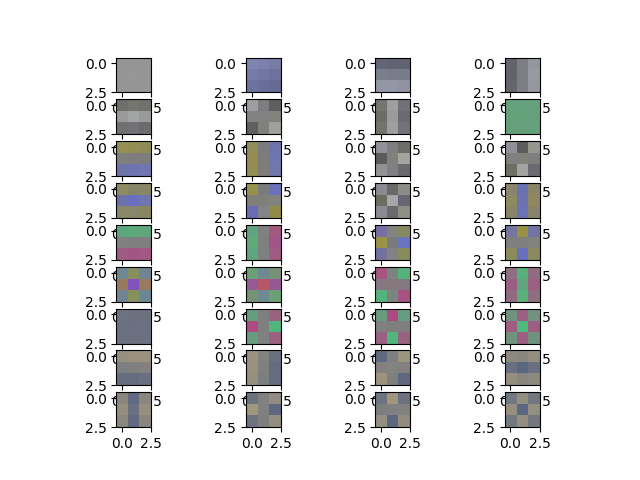

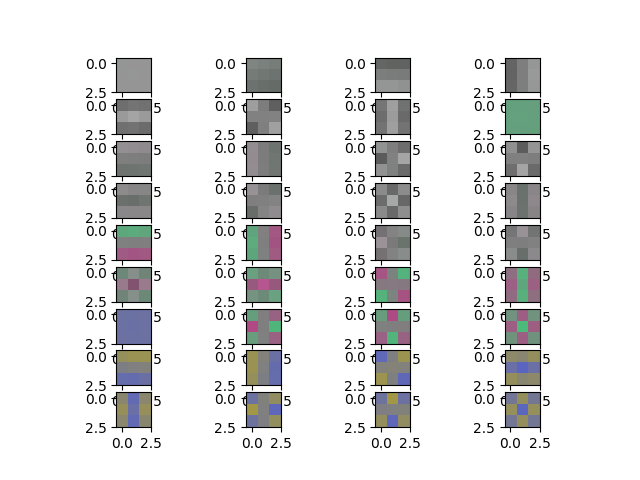

In [10]:
tetrachromat_analysis.doSpatialPCA()
# displays the Spatial PCA results first plotting in SML, and then in MQL space (the long wavelength cone space)
tetrachromat_analysis.displaySpatialPCA("./outputs/spatial_pca.png")